<a href="https://colab.research.google.com/github/nataliavalero-data/Talento-Tech/blob/main/Nat_Ejercicio_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar las bibliotecas necesarias
!pip install requests beautifulsoup4


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
# Step 1: Send a request to the IMDb Top 250 movies page
url = 'https://www.filmaffinity.com/co/ranking.php?rn=ranking_fa_movies'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

print(soup.body.string)

movie_list = []

# Paso 2: Extraer títulos, años, calificaciones y directores de las películas
movies = soup.select('ul.poster-list-grid.listview > li > ul')


for movie in movies:
    # Extraer el título
    title_div = movie.find('div', class_='mc-title')
    title = title_div.a.text.strip() if title_div and title_div.a else 'N/A'

    # Extraer el año
    data_divs = movie.find_all('div', class_='d-flex')
    year = data_divs[0].text.strip() if len(data_divs) > 0 else 'N/A'

    # Extraer la calificación
    rating_div = movie.find('div', class_='avg-rating')
    rating = rating_div.text.strip() if rating_div else 'N/A'

    # Extraer el director
    director_div = movie.find('div', class_='mc-director')
    director = director_div.a.text.strip() if director_div and director_div.a else 'N/A'

    # Agregar los detalles de la película a la lista
    movie_list.append({
        "Title": title,
        "Year": year,
        "Rating": rating,
        "Director": director
    })

# Paso 3: Crear un DataFrame para almacenar los datos extraídos
df = pd.DataFrame(movie_list)
df['Rating'] = df['Rating'].str.replace(',', '.', regex=False)


# Mostrar el DataFrame
print(df)

None
                           Title  Year Rating              Director
0                     El padrino  1972    9.0  Francis Ford Coppola
1           El Padrino: Parte II  1974    8.9  Francis Ford Coppola
2          Doce hombres en pugna  1957    8.7          Sidney Lumet
3          La lista de Schindler  1993    8.6      Steven Spielberg
4               Testigo de cargo  1957    8.6          Billy Wilder
5             Luces de la ciudad  1931    8.6       Charles Chaplin
6                  Sueño de fuga  1994    8.6        Frank Darabont
7               El gran dictador  1940    8.6       Charles Chaplin
8              Tiempos violentos  1994    8.6     Quentin Tarantino
9               Tiempos modernos  1936    8.6       Charles Chaplin
10                      El golpe  1973    8.5       George Roy Hill
11                  Ser o no ser  1942    8.5        Ernst Lubitsch
12                      Harakiri  1962    8.5      Masaki Kobayashi
13          El ocaso de una vida  1950    8

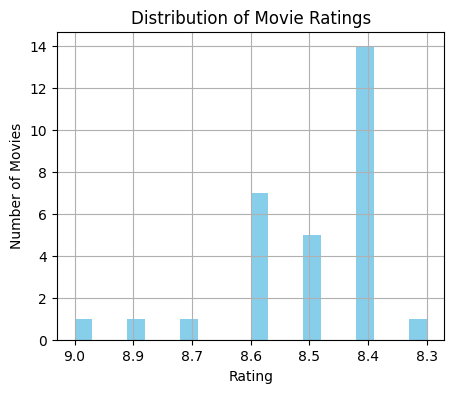

In [90]:

# Plot histogram of ratings
plt.figure(figsize=(5, 4))
df['Rating'].dropna().hist(bins=20, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.grid(True)
plt.show()


In [109]:
import numpy as np
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('movies', conn, if_exists='replace', index=False)

df1 = 'SELECT Year, AVG(Rating) AS average_rating FROM movies GROUP BY Year ORDER BY average_rating DESC LIMIT 20;'

df1 = pd.read_sql(df1, conn)
df1




,Year,average_rating
0,1972,9.000000
1,1974,8.900000
2,1994,8.600000
3,1993,8.600000
4,1940,8.600000
5,1936,8.600000
6,1931,8.600000
7,1957,8.566667
8,1997,8.500000
9,1973,8.500000


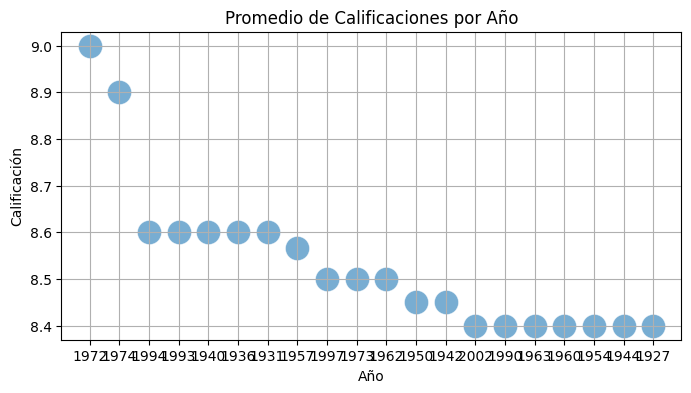

In [110]:
# Parámetros de la gráfica de burbujas


# Crear la gráfica de burbujas
plt.figure(figsize=(8, 4))  # Tamaño de la figura
scatter = plt.scatter(
    df1['Year'],
    df1['average_rating'],
    s=300,  # Tamaño de las burbujas (ajustar según sea necesario)
    alpha=0.6,  # Ajustar la transparencia de las burbujas
    edgecolor='w',   # Color del borde de las burbujas (blanco para mejor visibilidad)
    linewidth=0.5   # Ancho del borde de las burbujas
)

# Agregar títulos y etiquetas
plt.xlabel('Año')  # Etiqueta del eje X
plt.ylabel('Calificación')  # Etiqueta del eje Y
plt.title('Promedio de Calificaciones por Año')  # Título de la gráfica

# Mostrar la cuadrícula
plt.grid(True)  # Activar la cuadrícula

# Mostrar la gráfica
plt.show()

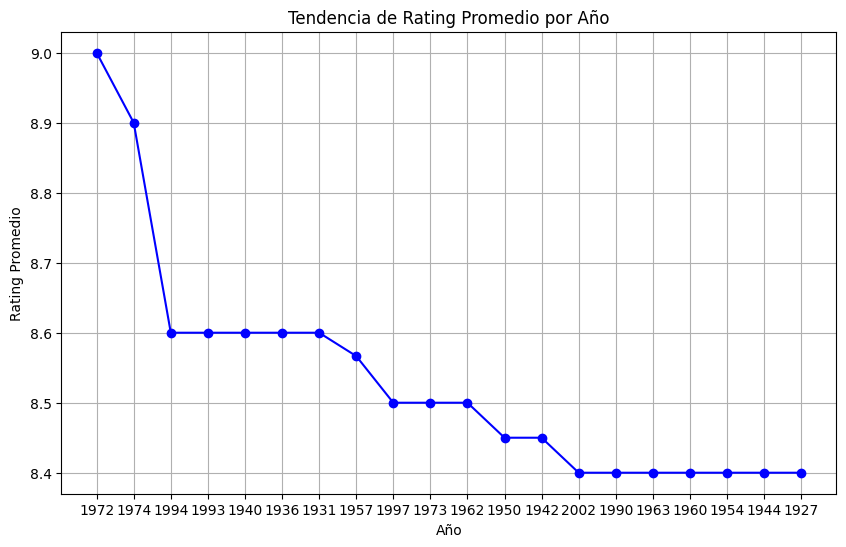

In [131]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar la tendencia con un gráfico de líneas
plt.plot(df1['Year'], df1['average_rating'], marker='o', linestyle='-', color='b')

# Agregar títulos y etiquetas
plt.xlabel('Año')  # Etiqueta del eje X
plt.ylabel('Rating Promedio')  # Etiqueta del eje Y
plt.title('Tendencia de Rating Promedio por Año')  # Título de la gráfica

# Mostrar la cuadrícula
plt.grid(True)  # Activar la cuadrícula

# Mostrar la gráfica
plt.show()

In [137]:
import numpy as np
import sqlite3

df2 = 'SELECT Director,  Max(Rating) AS max_rating  FROM movies GROUP BY Director ORDER BY max_rating desc LIMIT 10;'

df2 = pd.read_sql(df2, conn)
df2




,Director,max_rating
0,Francis Ford Coppola,9.0
1,Sidney Lumet,8.7
2,Steven Spielberg,8.6
3,Quentin Tarantino,8.6
4,Frank Darabont,8.6
5,Charles Chaplin,8.6
6,Billy Wilder,8.6
7,Roberto Benigni,8.5
8,Masaki Kobayashi,8.5
9,George Roy Hill,8.5


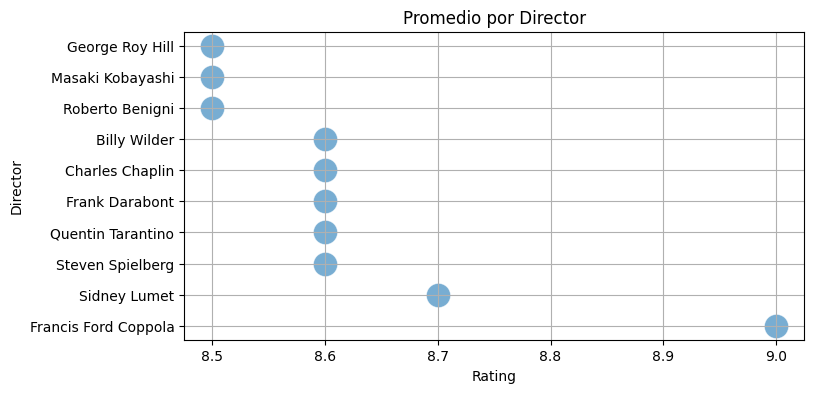

In [148]:
# Parámetros de la gráfica de burbujas


# Crear la gráfica de burbujas
plt.figure(figsize=(8, 4))  # Tamaño de la figura
scatter = plt.scatter(
    df2['max_rating'],
    df2['Director'],
    s=300,  # Tamaño de las burbujas (ajustar según sea necesario)
    alpha=0.6,  # Ajustar la transparencia de las burbujas
    edgecolor='w',   # Color del borde de las burbujas (blanco para mejor visibilidad)
    linewidth=0.5   # Ancho del borde de las burbujas
)

# Agregar títulos y etiquetas
plt.xlabel('Rating')  # Etiqueta del eje X
plt.ylabel('Director')  # Etiqueta del eje Y
plt.title('Promedio por Director')  # Título de la gráfica

# Mostrar la cuadrícula
plt.grid(True)  # Activar la cuadrícula

# Mostrar la gráfica
plt.show()